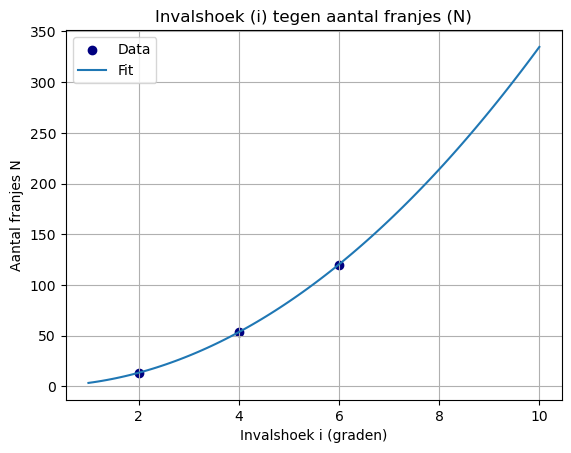

De brekingsindex: [1.9434781]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_fit(i, n): 
      
    # constanten
    l = (532 * 10**-9)   # golflengte (m)
    d = 0.012 # dikte (m)
    i_rad = i*np.pi/180
    return (2*d/l) * (np.sqrt(n**2 - np.sin(i_rad)**2) + ((np.sin(i_rad)**2)-1)/np.cos(i_rad) -n+1)

#i is invalshoek (graden)
#n is brekingsindex (-)

# data
i_data = np.array([2, 4, 6])
N_data = np.array([13, 54, 120])

# fit uitvoeren (alleen n laten fitten)
popt, pcov = curve_fit(N_fit, i_data, N_data, p0=[1.33]) 
n_fit = popt

# plot
i_fit = np.linspace(1, 10, 100)
plt.scatter(i_data, N_data, label="Data", color="navy")
plt.plot(i_fit, N_fit(i_fit, *popt), label="Fit")
plt.title("Invalshoek (i) tegen aantal franjes (N)")
plt.xlabel("Invalshoek i (graden)")
plt.ylabel("Aantal franjes N")
plt.grid()
plt.legend()
plt.show()

print("De brekingsindex:", n_fit)

#0 meting 18, 54, 120
#1 meting 28, 83, 124

Fitvergelijking: N = 192.45 * C + 69.53
De onbekende concentratie is 0.04427684572366731


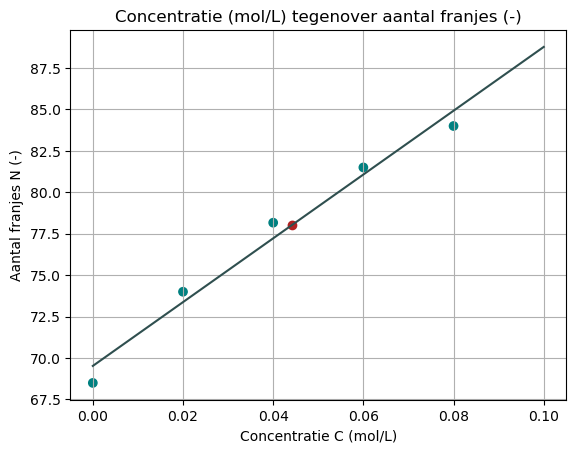

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def Linear(x, a, b):
    return a * x + b

#data
N_data = np.array([((67+69+70+68+69+ 68)/6), ((75+ 73+ 74+ 73+ 75+ 74)/6), ((78+ 78+ 79+ 79+ 77+ 78)/6), ((81+ 81+ 82+ 80+ 83+ 82)/6), ((84+ 85+ 84+ 83+ 85+ 83)/6), ((78+77 +77+ 79+ 78+ 79)/6)]) #Aantal franjes verschuivingen bij 4 graden
C_data = np.array([0, 0.02, 0.04, 0.06, 0.08, 0.04427684572366731]) #concentraties mol/L

popt, pcov = curve_fit(Linear, C_data, N_data)
a, b = popt

print(f"Fitvergelijking: N = {a:.2f} * C + {b:.2f}") #berekend de optimale waardes voor a en b afgerond op 2 decimalen

xfit = np.linspace(0, 0.1, 10)

#datapunten een eigen kleur geven
c= ['teal', 'teal', 'teal', 'teal', 'teal', 'firebrick']

#figuur plotten
plt.figure(1)
plt.grid()
plt.scatter(C_data, N_data, label="Data", color= c)
plt.xlabel('Concentratie C (mol/L)')
plt.ylabel('Aantal franjes N (-)')
plt.title('Concentratie (mol/L) tegenover aantal franjes (-)')
plt.plot(xfit, Linear(xfit, *popt), label="Fit", color="darkslategrey")

#gemiddelde onbekende aantal franjes
N= 78

#onbekende concentratie berekenen
C = (N-69.37)/194.91
print("De onbekende concentratie is", C)